In [1]:
!pip install scikeras

In [2]:
# Split the data
import numpy as np
import cv2
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.multiclass import  OneVsOneClassifier,OneVsRestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# Load processed feature matrix and labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from skimage.filters import sobel
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier


In [3]:
# TODO: Load data and splits if necessary
digits = load_digits()
X, y = digits.data, digits.target

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1094 - loss: 8.7040 - val_accuracy: 0.3333 - val_loss: 2.7605
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4578 - loss: 2.0353 - val_accuracy: 0.7056 - val_loss: 0.9624
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7156 - loss: 0.8930 - val_accuracy: 0.8194 - val_loss: 0.6118
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8033 - loss: 0.6046 - val_accuracy: 0.8639 - val_loss: 0.4411
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8770 - loss: 0.4412 - val_accuracy: 0.8722 - val_loss: 0.3651
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8904 - loss: 0.3419 - val_accuracy: 0.9028 - val_loss: 0.2991
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9016 - loss: 0.2986 - val_accuracy: 0.9167 - val_loss: 0.2599
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9216 - loss: 0.2337 - val_accuracy: 0.9222 - val_loss: 0.23

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,232 (28.25 KB)

 Trainable params: 2,410 (9.41 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,822 (18.84 KB)

None
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


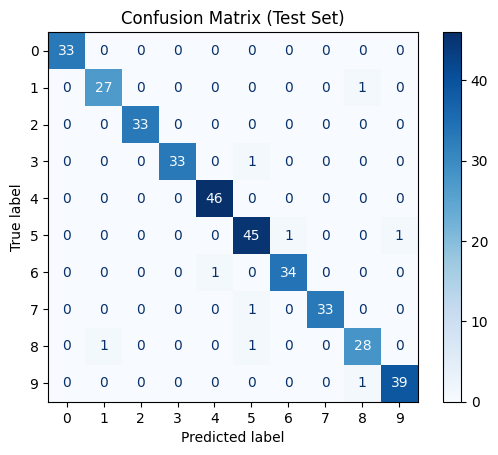

In [4]:

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: Create your first fully connected neural network with the following caracteristics:
# * 1 input layer
# * 1 hidden layer using 32 neurons
# * Input and hidden layers shall have relu activation functions
# * Output layer is activated with softmax
# * As input, we consider the pixels directly -- we'll look later into using engineered features
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'), #sigmoid 2x plus long mais meilleurs relu diff ~0.18 de diff
    keras.layers.Dense(10, activation='softmax')
])


# TODO: Compile the model (setting parameters on how the model will learn from the data)
# Use adam optimizer, sparse categorical cross entropy as loss, and at least the accuracy as the metric
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
#0.9527778029441833 pour adam

# TODO: Train the model and store training and validation history
history=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# TODO: Evaluate the model on the test set
test_loss, test_accuracy=model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")
print(model.summary())


predict_test=np.argmax(model.predict(X_test), axis=1)

cm=confusion_matrix(y_test, predict_test)

# 2. Affichage graphique
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Test Set)')
plt.show()

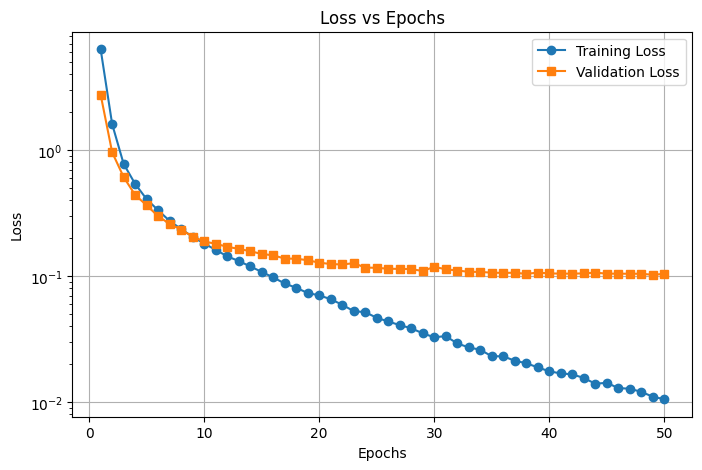

In [5]:
# Extract loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss vs epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='s')
plt.xlabel("Epochs")
plt.yscale("log")  # Apply log scale to the y-axis
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid()
plt.show()

# Save the trained model
model.save("digit_classifier_model.keras")  # Native Keras format

In [ ]:
#Comparaison de test accuracy en fonctions du nombres de couches de neuronnes et de leurs nombres, des paramètres d'activations et de l'optimiseur
def build_model(n_layers, n_neurons, activation='relu', optimizer='adam'):
    model=keras.Sequential()
    #couche d'entrée
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
    #couches successives
    for _ in range(n_layers):
        model.add(keras.layers.Dense(n_neurons, activation=activation))
    #couche de sortie
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model

# Hyperparamètres de test
param_grid={
    'n_layers': [1, 2, 3],
    'n_neurons': [32, 64, 128],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}

results={}

for n_layers in param_grid['n_layers']:
    for n_neurons in param_grid['n_neurons']:
        for activation in param_grid['activation']:
            for optimizer in param_grid['optimizer']:
                print(f"Training avec n_layers: {n_layers}, n_neurons: {n_neurons}, activation: {activation}, optimizer: {optimizer}")

                model=build_model(n_layers, n_neurons, activation, optimizer)
                history=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

                test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
                print(f"  Test accuracy: {test_accuracy}")

                key = f"Layers: {n_layers}, Neurons: {n_neurons}, Activation: {activation}, Optimizer: {optimizer}"
                results[key] = test_accuracy

# Print les résultats
print("\n--- Résultats ---")
for key, accuracy in results.items():
    print(f"{key}: {accuracy}")

best_config=max(results, key=results.get)
print(f"\nBest configuration: {best_config} avec accuracy: {results[best_config]}")



```
--- Résultats ---
Layers: 1, Neurons: 32, Activation: relu, Optimizer: adam: 0.9611111283302307
Layers: 1, Neurons: 32, Activation: relu, Optimizer: rmsprop: 0.9777777791023254
Layers: 1, Neurons: 32, Activation: sigmoid, Optimizer: adam: 0.9638888835906982
Layers: 1, Neurons: 32, Activation: sigmoid, Optimizer: rmsprop: 0.980555534362793
Layers: 1, Neurons: 64, Activation: relu, Optimizer: adam: 0.980555534362793
Layers: 1, Neurons: 64, Activation: relu, Optimizer: rmsprop: 0.980555534362793
Layers: 1, Neurons: 64, Activation: sigmoid, Optimizer: adam: 0.9777777791023254
Layers: 1, Neurons: 64, Activation: sigmoid, Optimizer: rmsprop: 0.9777777791023254
Layers: 1, Neurons: 128, Activation: relu, Optimizer: adam: 0.980555534362793
Layers: 1, Neurons: 128, Activation: relu, Optimizer: rmsprop: 0.9833333492279053
Layers: 1, Neurons: 128, Activation: sigmoid, Optimizer: adam: 0.9777777791023254
Layers: 1, Neurons: 128, Activation: sigmoid, Optimizer: rmsprop: 0.980555534362793
Layers: 2, Neurons: 32, Activation: relu, Optimizer: adam: 0.9666666388511658
Layers: 2, Neurons: 32, Activation: relu, Optimizer: rmsprop: 0.9777777791023254
Layers: 2, Neurons: 32, Activation: sigmoid, Optimizer: adam: 0.9555555582046509
Layers: 2, Neurons: 32, Activation: sigmoid, Optimizer: rmsprop: 0.9666666388511658
Layers: 2, Neurons: 64, Activation: relu, Optimizer: adam: 0.9722222089767456
Layers: 2, Neurons: 64, Activation: relu, Optimizer: rmsprop: 0.9861111044883728
Layers: 2, Neurons: 64, Activation: sigmoid, Optimizer: adam: 0.980555534362793
Layers: 2, Neurons: 64, Activation: sigmoid, Optimizer: rmsprop: 0.9777777791023254
Layers: 2, Neurons: 128, Activation: relu, Optimizer: adam: 0.9833333492279053
Layers: 2, Neurons: 128, Activation: relu, Optimizer: rmsprop: 0.9861111044883728
Layers: 2, Neurons: 128, Activation: sigmoid, Optimizer: adam: 0.9694444537162781
Layers: 2, Neurons: 128, Activation: sigmoid, Optimizer: rmsprop: 0.9777777791023254
Layers: 3, Neurons: 32, Activation: relu, Optimizer: adam: 0.9638888835906982
Layers: 3, Neurons: 32, Activation: relu, Optimizer: rmsprop: 0.9750000238418579
Layers: 3, Neurons: 32, Activation: sigmoid, Optimizer: adam: 0.9555555582046509
Layers: 3, Neurons: 32, Activation: sigmoid, Optimizer: rmsprop: 0.9638888835906982
Layers: 3, Neurons: 64, Activation: relu, Optimizer: adam: 0.9777777791023254
Layers: 3, Neurons: 64, Activation: relu, Optimizer: rmsprop: 0.9777777791023254
Layers: 3, Neurons: 64, Activation: sigmoid, Optimizer: adam: 0.9638888835906982
Layers: 3, Neurons: 64, Activation: sigmoid, Optimizer: rmsprop: 0.9722222089767456
Layers: 3, Neurons: 128, Activation: relu, Optimizer: adam: 0.9861111044883728
Layers: 3, Neurons: 128, Activation: relu, Optimizer: rmsprop: 0.9888888597488403
Layers: 3, Neurons: 128, Activation: sigmoid, Optimizer: adam: 0.9750000238418579
Layers: 3, Neurons: 128, Activation: sigmoid, Optimizer: rmsprop: 0.9722222089767456

Best configuration: Layers: 3, Neurons: 128, Activation: relu, Optimizer: rmsprop avec accuracy: 0.9888888597488403


```

